## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [14]:
import sys,json
import glob, os
from nilearn import plotting, datasets     

sys.path.append("/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/")

from stats_group_level import Stats

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. Configuration & parameters </font >

In [60]:
# Load config file ------------------------------------------------------------
with open('../../config/config_seed2voxels_2ndlevel.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified
    
ana2run=["C1C7_R_gmwm"]#,"C1C7_R_gmwm","C1C7_D_gmwm","C1C7_L_gmwm","C1C7_VR_gmwm","C1C7_DR_gmwm","C1C7_DL_gmwm","C1C7_gmwm"] # copy and pass the analyse name (same as config["seeds"])

#The model should be defined in the config file line 5 : "OneSampleT" "TwoSampT_paired" "TwoSampT_unpaired" "HigherOrder_paired"

### <font color=#4424D6> II. Initialize class based on this </font>

In [63]:
stats={}
for ana_name in ana2run:
    stats[ana_name]=Stats(config,ana_name,save_ana=True) # initialize the function


************************************** 
Initiate C1C7_R_gmwm analysis
  
> Statistical model: OneSampleT
> Number of participants: 31
> Mask : MNI_GM_3mm.nii
> Saved here : /cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//seed_to_voxels/summer_2023//2_second_level/OneSampleT/MNI_GM_3mm/MI/C1C7_R_gmwm
  


## <font color=#B2D732> <span style="background-color: #4424D6"> B/ SnPM

In [67]:
for ana_name in ana2run:
    stats[ana_name].snpm_OneSampleT(10,17,ana_name,[ana_name + "_FWE05.nii"])

One Sample T test done


## <font color=#B2D732> <span style="background-color: #4424D6"> B/ Create design matrix

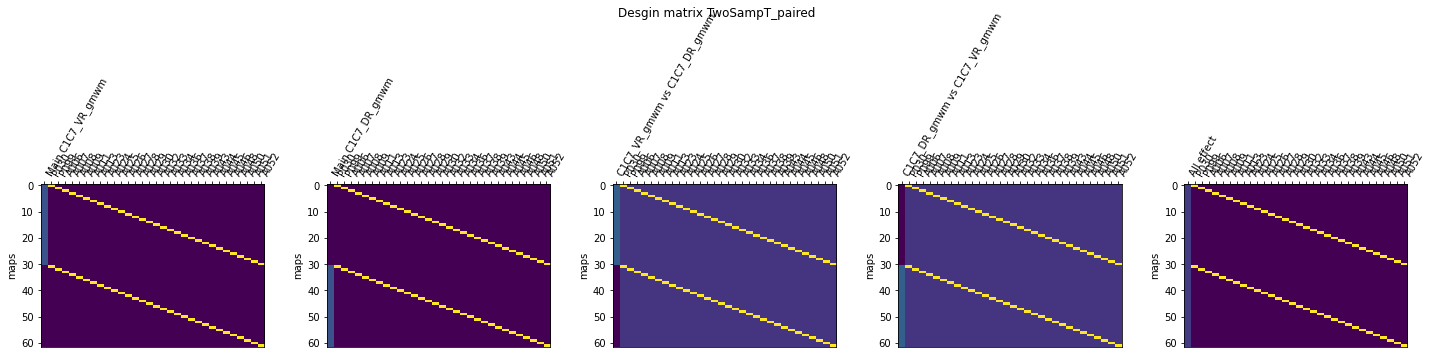

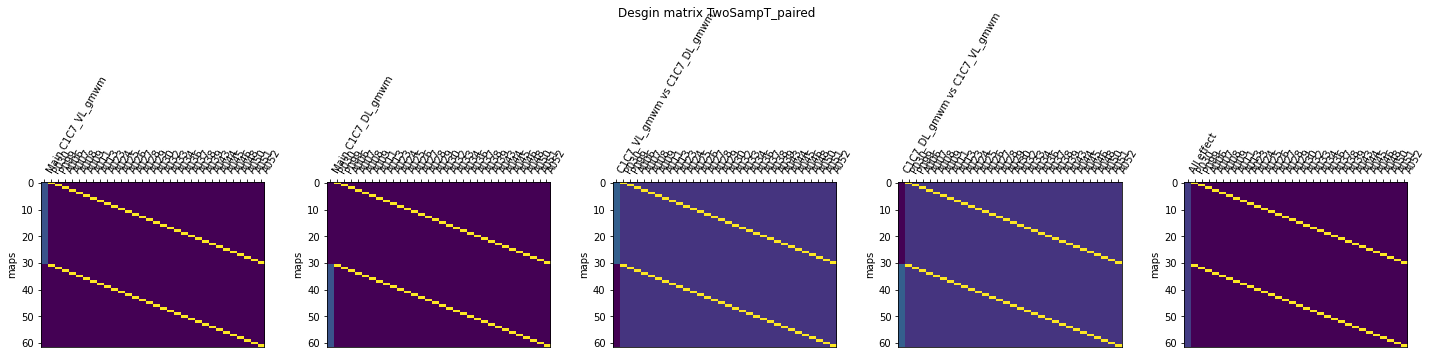

In [62]:
Design_matrix={}
for ana_name in ana2run:
    Design_matrix[ana_name]=stats[ana_name].design_matrix(plot_matrix= True,save_matrix=True) #contrast_name="4quad_9levels",


## <font color=#B2D732> <span style="background-color: #4424D6"> C/ Create second level model and apply correction

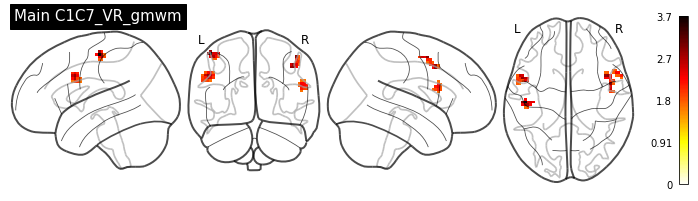

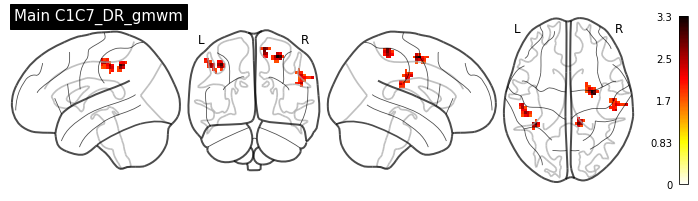

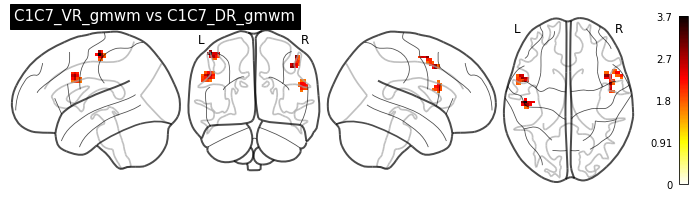

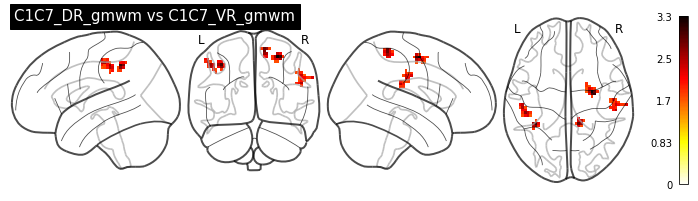

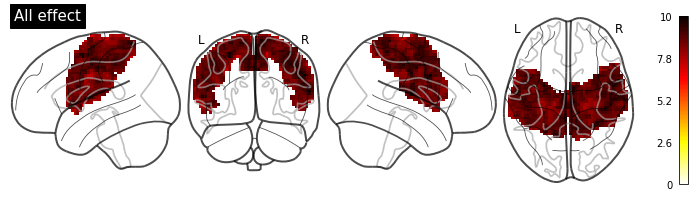

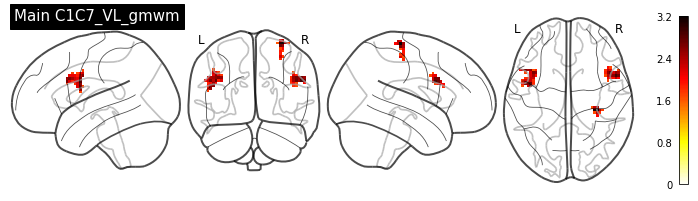

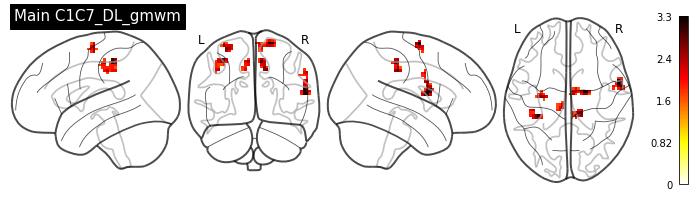

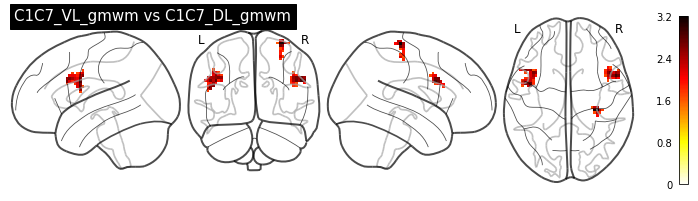

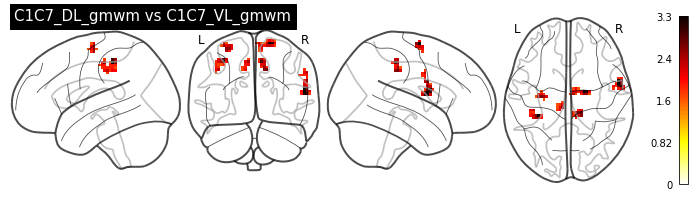

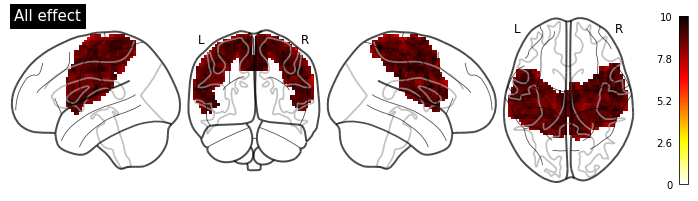

In [64]:
maps_uncorr={}
for ana_name in ana2run:
    maps_uncorr[ana_name]=stats[ana_name].secondlevelmodel(Design_matrix[ana_name],plot_2ndlevel=False,save_img=True,parametric=True) #stats_1T.secondlevelmodel(Design_matrix_1T)
    stats[ana_name].secondlevel_correction(maps_uncorr[ana_name],p_value=0.05,cluster_threshold=20,corr='fpr',plot_stats_corr=True,save_img=True) #stats_1T.secondlevelmodel(Design_matrix_1T)


In [74]:
import numpy as np
np.hstack((np.tile(([[1] * 2+ [0] * 2]),2)))

array([1, 1, 0, 0, 1, 1, 0, 0])

## <font color=#B2D732> <span style="background-color: #4424D6"> D/ plot surface view

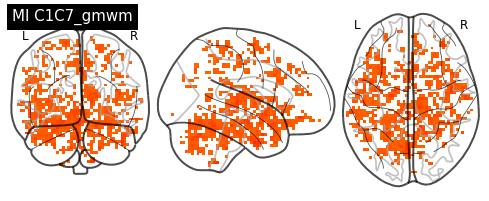

In [19]:
from nilearn import plotting
main_dir=config["second_level"]+"/OneSampleT/MNI_GM_3mm/"
seeds=["C1C7_gmwm"]#,"C1C7_DL_gmwm","C1C7_VR_gmwm","C1C7_VL_gmwm"]
measures=["MI"]
for seed in seeds:

    for measure in measures:
        image=glob.glob(main_dir + "/" + measure + "/" + seed + "/uncorr/zscore*")[0]

        #image=glob.glob(main_dir + "/" + measure + "/" + seed + "/fpr_corrected/Main "+seed+"_fpr_p01.nii.gz")[0]



        #plotting.plot_stat_map(image,threshold=0, vmax=4, display_mode='ortho',draw_cross=False,cut_coords=[-1,-17.5,59],title=measure + " " + seed)

        plotting.plot_glass_brain(image,threshold=8.2, vmax=17, title=measure + " " + seed)


/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/plotting/displays/_slicers.py:382: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


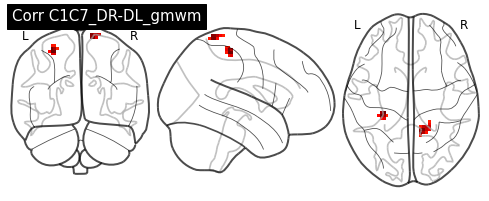

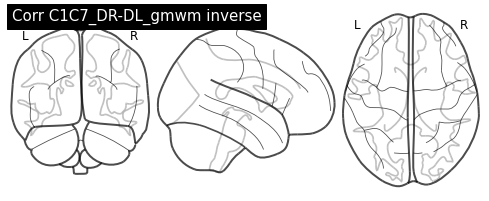

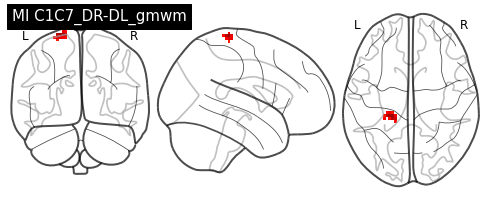

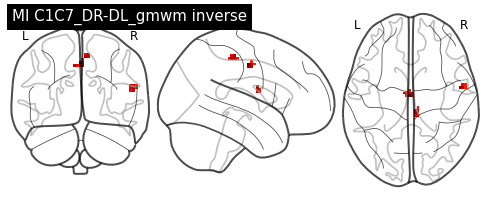

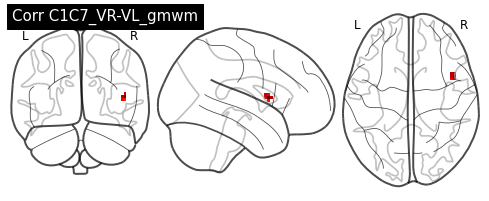

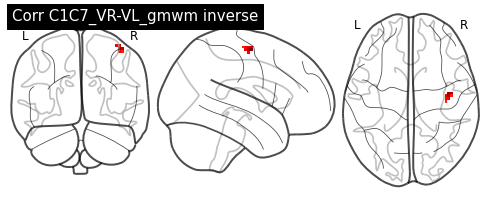

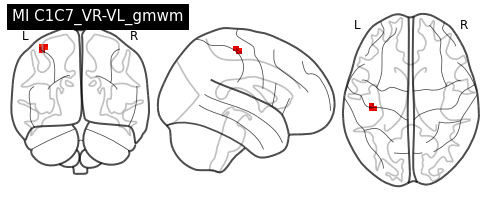

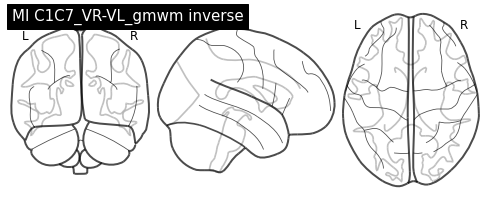

In [6]:
from nilearn import plotting
main_dir=config["second_level"]+"/TwoSampT_paired/MNI_GM_3mm_SMC/"
seeds=["C1C7_DR-DL_gmwm","C1C7_VR-VL_gmwm"]
measures=["Corr","MI"]
for seed in seeds:
    for measure in measures:
        image1=glob.glob(main_dir + "/" + measure + "/" + seed + "/fpr_corrected/"+ seed.split("-")[0] + "*fpr_p01.nii.gz")[0]
        image2=glob.glob(main_dir + "/" + measure + "/" + seed + "/fpr_corrected/C1C7_"+ seed.split("-")[-1] + "*fpr_p01.nii.gz")[0]

        plotting.plot_glass_brain(image1,threshold=0, vmax=4, title=measure + " " + seed)
        plotting.plot_glass_brain(image2,threshold=0, vmax=4, title=measure + " " + seed + " inverse")


In [52]:
ana_name

'C1C7_VL-DL_gmwm'

In [48]:
import matlab.engine
import stats_snpm
sys.path.append("/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/stats_snpm/")

os.chdir("/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/stats_snpm/")
eng = matlab.engine.start_matlab()


In [49]:
input_dir="/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/summer_2023/1_first_level/C1C7_R_gmwm/MNI_GM_3mm_fc_maps/MI/"
tag_file="mi_31subjects_seed_C1C7_"
mask_filename=config["mask_path"].split(".")[0] + ".nii"
output_dir="/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/summer_2023/2_second_level/OneSampleT/MNI_GM_3mm/snpm/C1C7_R_gmwm/"
output_filename="C1C7_R_gmwm_FWE"
#print(eng.SnPM_OneSampT(10,2.03,input_dir,tag_file,mask_filename,output_dir,output_filename))

One Sample T test done


In [32]:
mi_31subjects_seed_C1C7_R_gmwm_ss.nii
mi_31subjects_seed_C1C7_R_gmwm_s

'/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/mask/brain'

In [40]:
os.chdir('/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/summer_2023/1_first_level/C1C7_R_gmwm/MNI_GM_3mm_fc_maps/MI/')
!ls

mi_31subjects_seed_C1C7_R_gmwm_ss_mean.nii.gz  mi_z__sub-A006.nii.gz
mi_31subjects_seed_C1C7_R_gmwm_ss.nii	       mi_z__sub-A007.nii.gz
mi_sub-A006.nii.gz			       mi_z__sub-A008.nii.gz
mi_sub-A007.nii.gz			       mi_z__sub-A009.nii.gz
mi_sub-A008.nii.gz			       mi_z__sub-A011.nii.gz
mi_sub-A009.nii.gz			       mi_z__sub-A013.nii.gz
mi_sub-A011.nii.gz			       mi_z__sub-A023.nii.gz
mi_sub-A013.nii.gz			       mi_z__sub-A024.nii.gz
mi_sub-A023.nii.gz			       mi_z__sub-A025.nii.gz
mi_sub-A024.nii.gz			       mi_z__sub-A026.nii.gz
mi_sub-A025.nii.gz			       mi_z__sub-A027.nii.gz
mi_sub-A026.nii.gz			       mi_z__sub-A028.nii.gz
mi_sub-A027.nii.gz			       mi_z__sub-A029.nii.gz
mi_sub-A028.nii.gz			       mi_z__sub-A030.nii.gz
mi_sub-A029.nii.gz			       mi_z__sub-A032.nii.gz
mi_sub-A030.nii.gz			       mi_z__sub-A033.nii.gz
mi_sub-A032.nii.gz			       mi_z__sub-A034.nii.gz
mi_sub-A033.nii.gz			       mi_z__sub-A036.nii.gz
mi_sub-A034.nii.gz			       mi_z__sub-A037.nii.gz
mi_sub-A036.ni